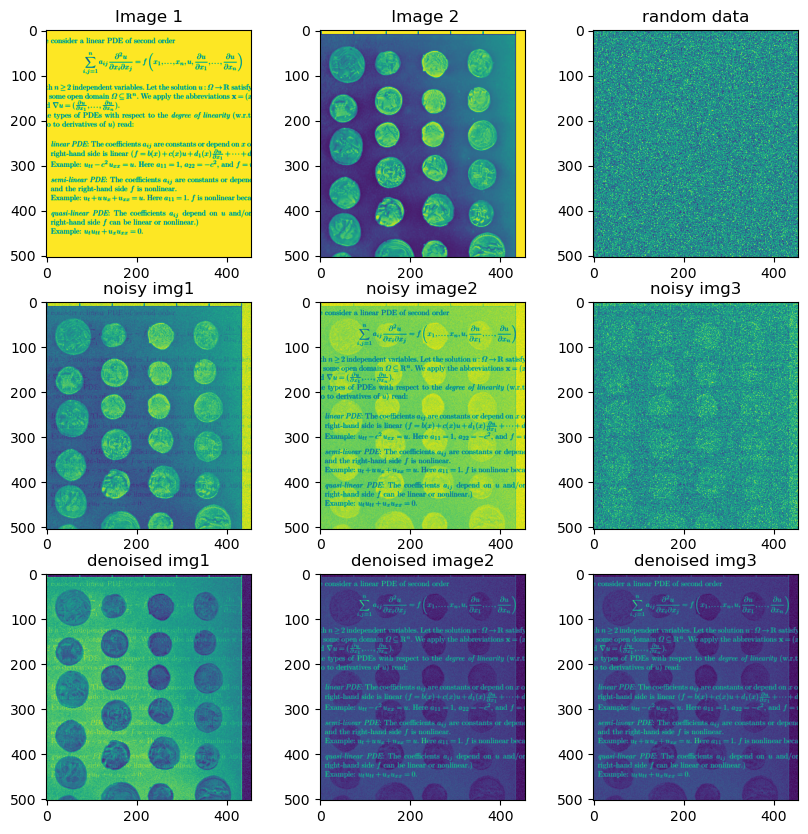

In [60]:
import numpy as np
from sklearn.decomposition import FastICA
from PIL import Image
import matplotlib.pyplot as plt
import skimage.io

# images
img1 = skimage.io.imread(r'C:/thesis/image1.png' ,as_gray=True)
img2 = skimage.io.imread(r'C:/thesis/image0.png' ,as_gray = True)

#image with noise
noise = np.random.uniform(0, 1, (503, 455))
noisy_img1 = img1 +  4.2*img2 + noise
noisy_img2 = 6.2*img1 + 1.7*img2 + noise
noisy_img3 = img1 + img2 + 5.4*noise

X = np.concatenate((noisy_img1.reshape((-1, 1)), noisy_img2.reshape((-1, 1)), noisy_img3.reshape((-1, 1))), axis=0)

ica = FastICA(max_iter=6000,whiten='eigh')
S = ica.fit_transform(X)

# Reshaping the 1st, 2nd, and 3rd images after fastica
num_pixels = img1.shape[0] * img1.shape[1]
img1_denoised = S[:num_pixels, :].reshape(503,455) # extracting first num_pixels data and the reshaping to 2D array 
img2_denoised = S[num_pixels:num_pixels*2, :].reshape(503,455) # extracting second num_pixels data and the reshaping to 2D array
img3_denoised = S[num_pixels*2:, :].reshape(503,455) # extracting last num_pixels data and the reshaping to 2D array

# image display
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Image 1')
axs[0, 1].imshow(img2)
axs[0, 1].set_title(' Image 2')
axs[0, 2].imshow(noise)
axs[0, 2].set_title('random data')
axs[1, 0].imshow(noisy_img1)
axs[1, 0].set_title('noisy img1')
axs[1, 1].imshow(noisy_img2)
axs[1, 1].set_title('noisy image2')
axs[1, 2].imshow(noisy_img3)
axs[1, 2].set_title('noisy img3')
axs[2, 0].imshow(img1_denoised)
axs[2, 0].set_title('denoised img1')
axs[2, 1].imshow(img2_denoised)
axs[2, 1].set_title('denoised image2')
axs[2, 2].imshow(img2_denoised)
axs[2, 2].set_title('denoised img3')
plt.show()


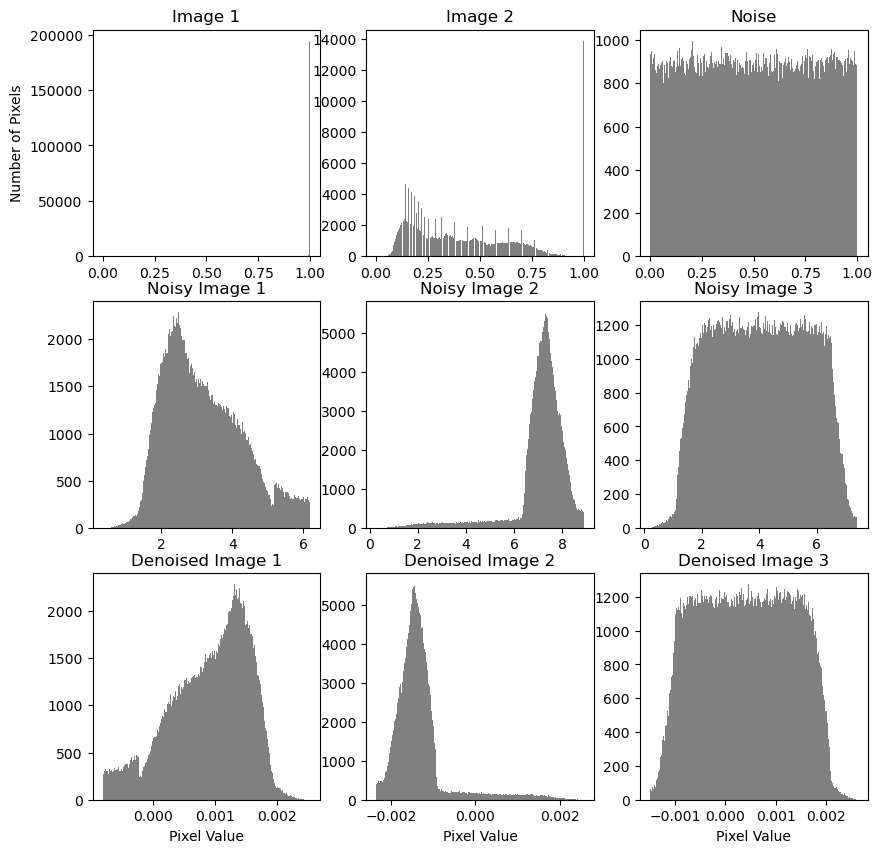

In [61]:
hist1, bins1 = np.histogram(img1.ravel(), bins=256)
hist2, bins2 = np.histogram(img2.ravel(), bins=256)
hist3, bins3 = np.histogram(noise.ravel(), bins=256)

hist4, bins4 = np.histogram(noisy_img1.ravel(), bins=256)
hist5, bins5 = np.histogram(noisy_img2.ravel(), bins=256)
hist6, bins6 = np.histogram(noisy_img3.ravel(), bins=256)

hist7, bins7 = np.histogram(img1_denoised.ravel(), bins=256)
hist8, bins8 = np.histogram(img2_denoised.ravel(), bins=256)
hist9, bins9 = np.histogram(img3_denoised.ravel(), bins=256)

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(3,3, figsize=(10, 10))

# Plot the histograms of pixel values for each image in a different subplot
axs[0,0].hist(img1.ravel(), bins=bins1, color='gray')
axs[0,0].set_title('Image 1')
axs[0,0].set_ylabel('Number of Pixels')

axs[0,1].hist(img2.ravel(), bins=bins2, color='gray')
axs[0,1].set_title('Image 2')



axs[0,2].hist(noise.ravel(), bins=bins3, color='gray')
axs[0,2].set_title('Noise')



axs[1,0].hist(noisy_img1.ravel(), bins=bins4, color='gray')
axs[1,0].set_title('Noisy Image 1')



axs[1,1].hist(noisy_img2.ravel(), bins=bins5, color='gray')
axs[1,1].set_title('Noisy Image 2')



axs[1,2].hist(noisy_img3.ravel(), bins=bins6, color='gray')
axs[1,2].set_title('Noisy Image 3')



axs[2,0].hist(img1_denoised.ravel(), bins=bins7, color='gray')
axs[2,0].set_title('Denoised Image 1')
axs[2,0].set_xlabel('Pixel Value')


axs[2,1].hist(img2_denoised.ravel(), bins=bins8, color='gray')
axs[2,1].set_title('Denoised Image 2')
axs[2,1].set_xlabel('Pixel Value')


axs[2,2].hist(img3_denoised.ravel(), bins=bins9, color='gray')
axs[2,2].set_title('Denoised Image 3')
axs[2,2].set_xlabel('Pixel Value')


# Show the figure
plt.show()